In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/content/creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20227 entries, 0 to 20226
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      20227 non-null  int64  
 1   V1      20227 non-null  float64
 2   V2      20227 non-null  float64
 3   V3      20227 non-null  float64
 4   V4      20227 non-null  float64
 5   V5      20227 non-null  float64
 6   V6      20227 non-null  float64
 7   V7      20227 non-null  float64
 8   V8      20227 non-null  float64
 9   V9      20227 non-null  float64
 10  V10     20227 non-null  float64
 11  V11     20227 non-null  float64
 12  V12     20227 non-null  float64
 13  V13     20227 non-null  float64
 14  V14     20227 non-null  float64
 15  V15     20227 non-null  float64
 16  V16     20227 non-null  float64
 17  V17     20227 non-null  float64
 18  V18     20227 non-null  float64
 19  V19     20227 non-null  float64
 20  V20     20227 non-null  float64
 21  V21     20227 non-null  float64
 22

In [4]:
df.isnull().sum()
df[df.isnull().any(axis=1)]
df = df.dropna()



In [5]:
X=df.drop(['id','Class'],axis=1, errors='ignore')
y=df['Class']

In [6]:
print(X.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [7]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [8]:
X_train.shape

(16180, 29)

In [9]:
X_test.shape

(4046, 29)

In [10]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
print(pd.Series(y_train).value_counts(normalize=True))

Class
0.0    0.995735
1.0    0.004265
Name: proportion, dtype: float64


In [12]:
rf_model=RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

In [13]:
cv_scores=cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='f1')
print("\nCross-validation scores:" ,cv_scores)
print("Average f1 score:" ,np.mean(cv_scores))


Cross-validation scores: [0.7826087  0.72       1.         0.96296296 0.92307692]
Average f1 score: 0.8777297163384119


In [16]:
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [21]:
y_pred=rf_model.predict(X_test_scaled)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4029
         1.0       1.00      0.82      0.90        17

    accuracy                           1.00      4046
   macro avg       1.00      0.91      0.95      4046
weighted avg       1.00      1.00      1.00      4046



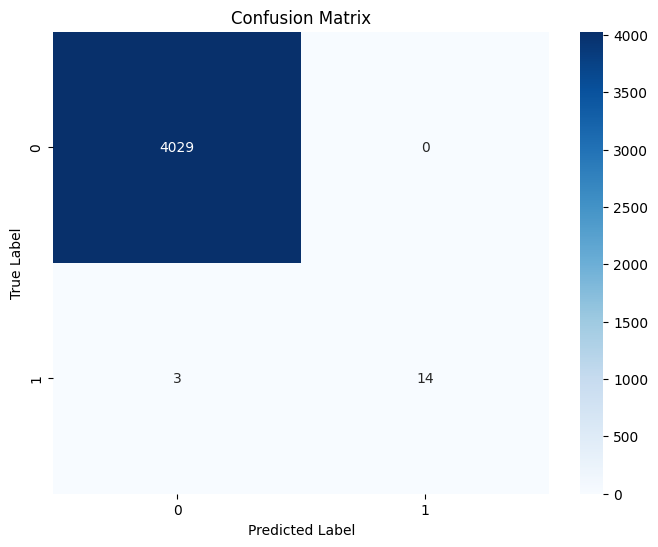

In [24]:
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [26]:
importance=rf_model.feature_importances_
feature_imp=pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values('Importance', ascending=False)

In [27]:
feature_imp.head()

,Feature,Importance
10,V11,0.113302
11,V12,0.105442
16,V17,0.101310
3,V4,0.095155
8,V9,0.072867


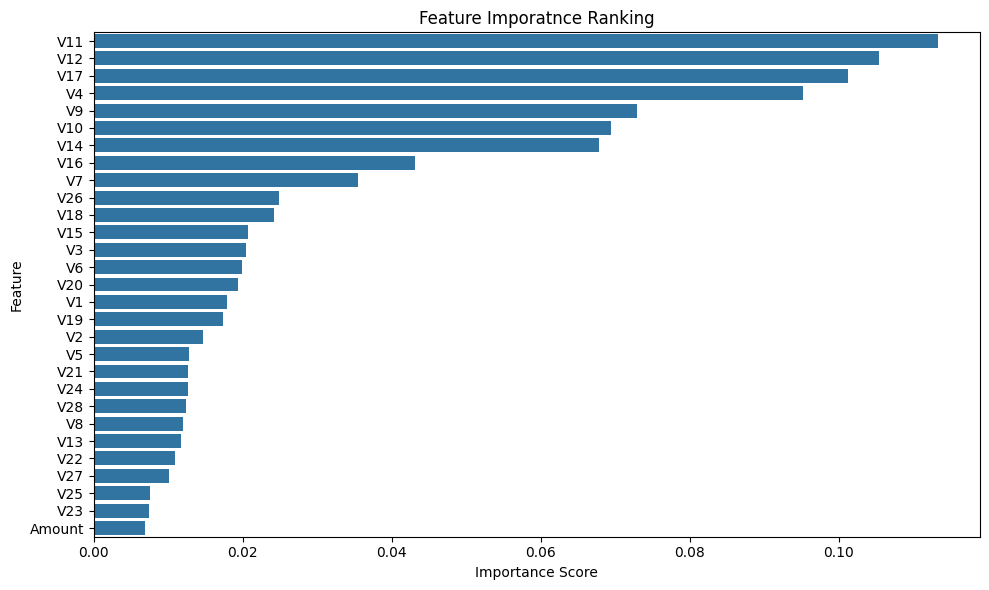

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=feature_imp,x='Importance', y='Feature')
plt.title('Feature Imporatnce Ranking')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

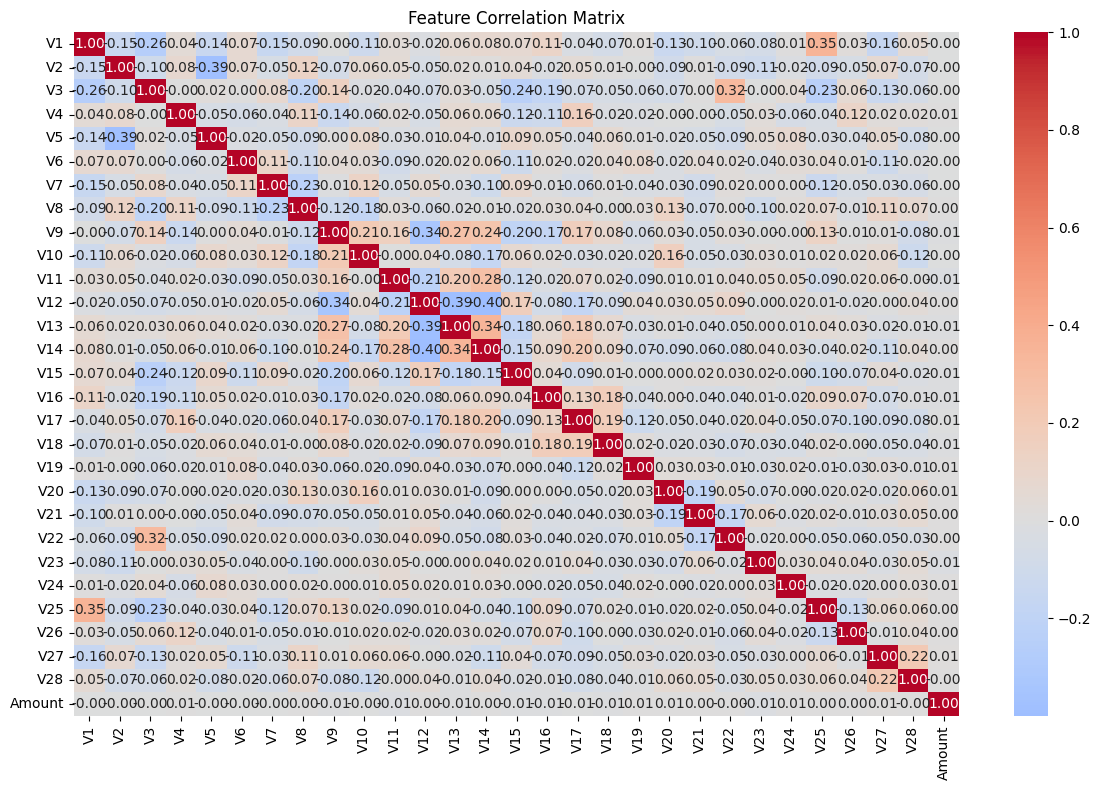

In [31]:
plt.figure(figsize=(12,8))
correlation_matrix=X.corr()
sns.heatmap(correlation_matrix,cmap='coolwarm',center=0,annot=True,fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [34]:
from sklearn.metrics import roc_curve, auc


In [35]:
y_pred_proba=rf_model.predict_proba(X_test_scaled)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
roc_auc=auc(fpr,tpr)

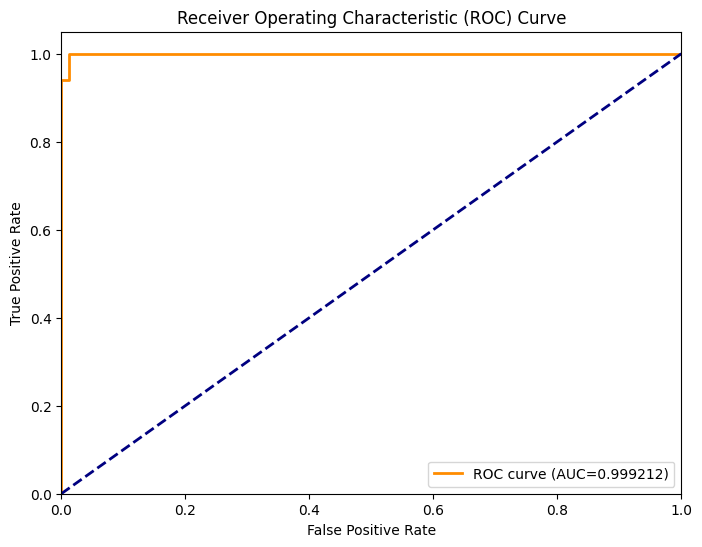

In [36]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC curve (AUC={roc_auc:2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()